In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os, sys

# Serial version

In [59]:
omp="2024-03-14_13-37-05"
serial="2024-03-14_13-39-02"
filename_omp=f"../benchmarks/benchmark_{omp}.csv"
filename_serial=f"../benchmarks/benchmark_{serial}.csv"

data_omp = {"gen_count": [], "n": [], "density": [], "seed": [], "time": []}
data_serial = {"gen_count": [], "n": [], "density": [], "seed": [], "time": []}

with open(filename_omp, "r") as fh:
    for line in fh:
        gen_count, n, density, seed, time = list(map(eval, line.split(",")))
        data_omp["gen_count"].append(gen_count)
        data_omp["n"].append(n)
        data_omp["density"].append(density)
        data_omp["seed"].append(seed)
        data_omp["time"].append(time)
        
df_omp = pd.DataFrame(data_omp)

with open(filename_serial, "r") as fh:
    for line in fh:
        gen_count, n, density, seed, time = list(map(eval, line.split(",")))
        data_serial["gen_count"].append(gen_count)
        data_serial["n"].append(n)
        data_serial["density"].append(density)
        data_serial["seed"].append(seed)
        data_serial["time"].append(time)

df_serial = pd.DataFrame(data_serial)

df_omp
#df_serial

,gen_count,n,density,seed,time
0,1000,40,0.4,1,0.4
1,1000,50,0.4,1,0.8
2,1000,60,0.4,1,1.4
3,1000,70,0.4,1,2.2
4,1000,80,0.4,1,3.3
5,1000,90,0.4,1,4.7
6,1000,100,0.4,1,6.4
7,1000,110,0.4,1,8.6
8,1000,120,0.4,1,11.1


<Axes: xlabel='n', ylabel='speedup'>

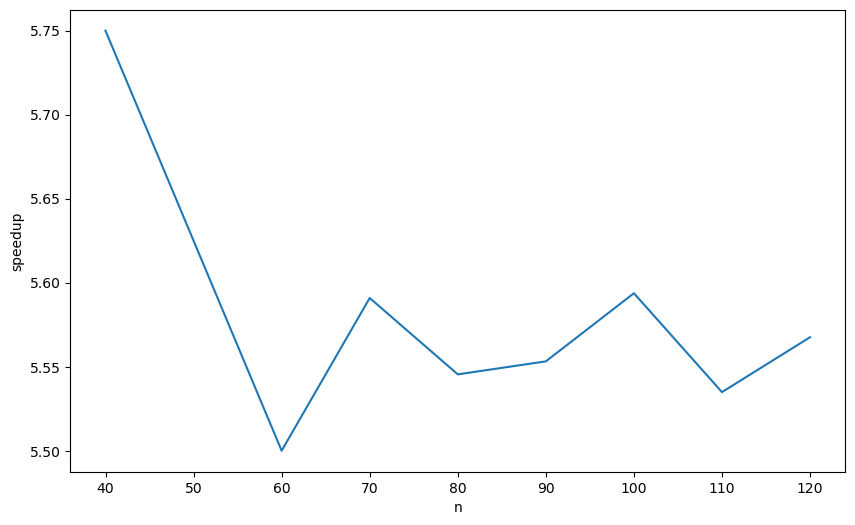

In [60]:
# for every N in df_omp calculate the speedup relative to df_serial
speedup = []
for i in range(len(df_omp)):
    n = df_omp["n"][i]
    time_omp = df_omp["time"][i]
    time_serial = df_serial[df_serial["n"] == n]["time"].values[0]
    if time_serial == 0 or time_omp == 0:
        speedup.append(0)
        continue
    speedup.append(time_serial / time_omp)

df_omp["speedup"] = speedup

# show the speedup for every N in a plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_omp, x="n", y="speedup")

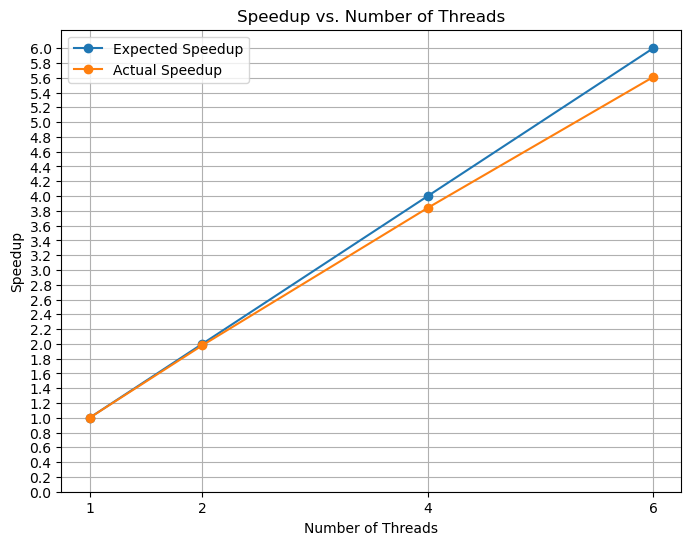

In [61]:
# Number of threads
threads = [1, 2, 4, 6]

# Speedup values (you can replace these with your own values)
speedup_expected = threads
speedup_actual = [1.0, 1.98, 3.84, 5.61]

# Plotting
plt.figure(figsize=(8, 6))

# Plotting the expected speedup line
plt.plot(threads, speedup_expected, marker='o', label='Expected Speedup')

# Plotting the actual speedup line
plt.plot(threads, speedup_actual, marker='o', label='Actual Speedup')

# Adding labels and title
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of Threads')
plt.xticks([1, 2, 4, 6])
plt.yticks([i/10 for i in range(0, 61, 2)])  # Range from 0.0 to 6.0 with increments of 0.2
plt.grid(True)
plt.legend()

# Displaying the plot
plt.show()

In [62]:
cache_miss=f"../benchmarks/cache-miss.csv"

data_cm = {"n": [], "gen_count": [], "type": [], "llc": [], "l1": [], "time": [], "speedup": []}

with open(cache_miss, "r") as fh:
    for line in fh:
        n, gen_count, typ, llc, l1, time = list(map(eval, line.split(",")))
        data_cm["n"].append(n)
        data_cm["gen_count"].append(gen_count)
        data_cm["type"].append(typ)
        data_cm["llc"].append(llc)
        data_cm["l1"].append(l1)
        data_cm["time"].append(time)
        
df_cm = pd.DataFrame(data_cm)
df_cm

ValueError: All arrays must be of the same length

<Axes: xlabel='n', ylabel='llc'>

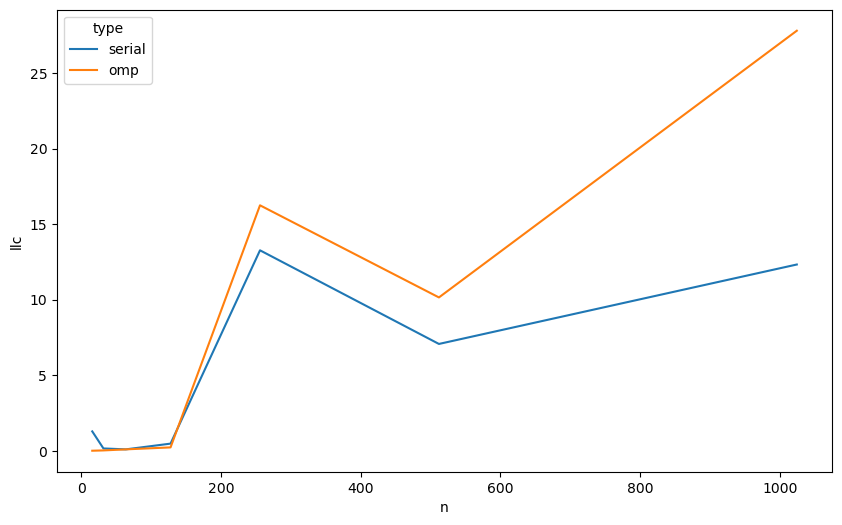

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cm, x="n", y="llc", hue="type")

<Axes: xlabel='n', ylabel='l1'>

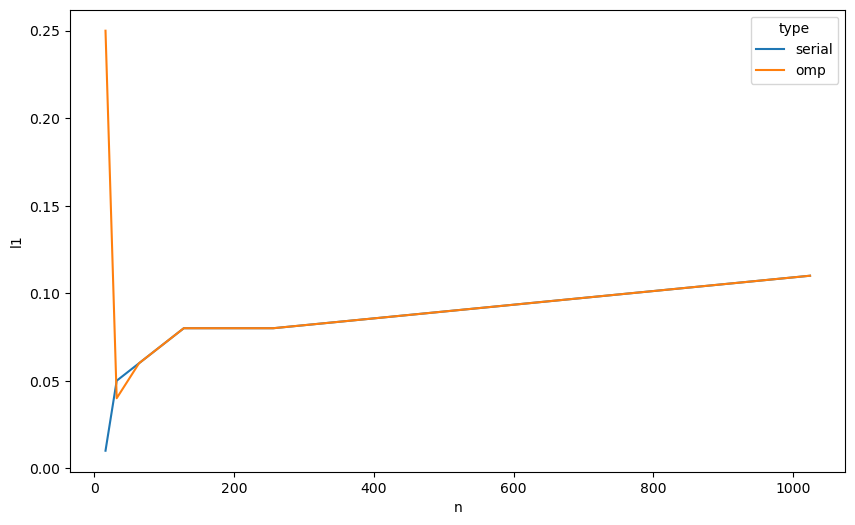

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cm, x="n", y="l1", hue="type")

[5.155172413793103,
 5.527777777777778,
 5.572093023255814,
 5.574766355140187,
 5.584112149532711,
 5.588785046728972,
 5.568075117370892]

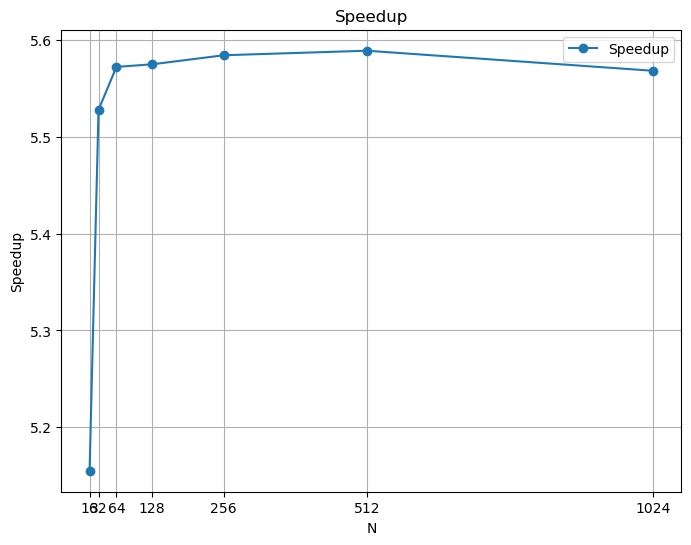

In [ ]:
# caluclate speedup for cache miss
speedup = []
ns = []
for i in range(len(df_cm)):
    if df_cm["type"][i] == "omp":
        ns.append(n)
        continue
    n = df_cm["n"][i]
    time_serial = df_cm["time"][i]
    time_omp = df_cm["time"][i+1]
    if time_serial == 0 or time_omp == 0:
        speedup.append(0)
        continue
    speedup.append(time_serial / time_omp)

# Plotting
plt.figure(figsize=(8, 6))

# Plotting the actual speedup line
plt.plot(ns, speedup, marker='o', label='Speedup')

# Adding labels and title
plt.xlabel('N')
plt.ylabel('Speedup')
plt.title('Speedup')

plt.xticks(ns)
plt.grid(True)
plt.legend()

# Displaying the plot
plt.show()